# Crime Analysis Modeling

The purpose of this notebook is to begin the training of machine learning algorithms to analyze the likelihood of becoming a victim of a crime - violent or non-violent within Kansas City Metropolotian area based on the time of the year and the individuals age range. 

It will be done in two parts - first through a multi-label classification by predicting if a crime Is_Violent, Is_Property_Crime, Is_Crime_Against_Person, Is_Crime_Against_Society and through single label classification of Offense_Rank which is ordinal encoded based on the UCR program classifications.  

## Read in CSV

In [15]:
import pandas as pd
csv_file_path = '/Users/lindseysullivan/Documents/School/Kansas-City-Crime-Analysis/Data/Data_Sets/KCPD-5-Year-Analysis-Model.csv'
df = pd.read_csv(csv_file_path)

# Multi-Label Classification Predictive Models

### Is_Violent/Type of Crime (Is_Property_Crime, Is_Crime_Against_Person, Is_Crime_Against_Society)
The selection of these features is to quickly analyze if a crime would be violent and the classification of the crime based on the time frame and the age_range explored below. This is explored through the Random Forest, K-Nearest Neighbor (K-NN), and an Support Vector Model (SVM) models.

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

# Feature and Target Setup
X = df[['sin_Quarter', 'cos_Quarter', 'sin_Months', 'cos_Months', 'sin_DayOfWeek', 'cos_DayOfWeek', 'Offense_Rank', 'age_range_encoded']]
y = df[['Is_Violent', 'Is_Property_Crime', 'Is_Crimes_Against_Person', 'Is_Crimes_Against_Society']]

# Splitting Data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Evaluating the model
print(f'Model accuracy: {accuracy:.4f}')
print('--------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=y.columns,digits=3, zero_division=0))
print('--------------------')
print('Multilabel Confusion Matrix:')
print(multilabel_confusion_matrix(y_test, y_pred))
print('--------------------')
individual_accuracies = (y_pred == y_test).mean(axis=0)
print(f"Individual Label Accuracies: {individual_accuracies}")

Model accuracy: 0.9985
--------------------
Classification Report:
                           precision    recall  f1-score   support

               Is_Violent      1.000     0.998     0.999     14434
        Is_Property_Crime      0.999     0.999     0.999     29529
 Is_Crimes_Against_Person      1.000     0.994     0.997     11301
Is_Crimes_Against_Society      0.998     1.000     0.999     48228

                micro avg      0.999     0.999     0.999    103492
                macro avg      0.999     0.998     0.999    103492
             weighted avg      0.999     0.999     0.999    103492
              samples avg      0.999     0.999     0.999    103492

--------------------
Multilabel Confusion Matrix:
[[[74624     0]
  [   30 14404]]

 [[59513    16]
  [   15 29514]]

 [[77755     2]
  [   65 11236]]

 [[40754    76]
  [   20 48208]]]
--------------------
Individual Label Accuracies: Is_Violent                   0.999663
Is_Property_Crime            0.999652
Is_Crimes_Again

## k-NN (k-Nearest Neighbor)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix

# Feature and Target Setup
X = df[['sin_Quarter', 'cos_Quarter', 'sin_Months', 'cos_Months', 'sin_DayOfWeek', 'cos_DayOfWeek', 'Offense_Rank', 'age_range_encoded']]
y = df[['Is_Violent', 'Is_Property_Crime', 'Is_Crimes_Against_Person', 'Is_Crimes_Against_Society']]

# Splitting Data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the Model
print(f'Model Accuracy: {accuracy:.4f}')
print('--------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=y.columns, zero_division=0, digits=3))
print('--------------------')
print('Multilabel Confusion Matrix:')
print(multilabel_confusion_matrix(y_test, y_pred))
print('--------------------')
individual_accuracies = (y_pred == y_test).mean(axis=0)
print(f"Individual Label Accuracies: {individual_accuracies}")

Model Accuracy: 0.9995
--------------------
Classification Report:
                           precision    recall  f1-score   support

               Is_Violent      1.000     0.999     0.999     14434
        Is_Property_Crime      1.000     1.000     1.000     29529
 Is_Crimes_Against_Person      1.000     0.998     0.999     11301
Is_Crimes_Against_Society      0.999     1.000     1.000     48228

                micro avg      1.000     0.999     1.000    103492
                macro avg      1.000     0.999     0.999    103492
             weighted avg      1.000     0.999     1.000    103492
              samples avg      1.000     1.000     1.000    103492

--------------------
Multilabel Confusion Matrix:
[[[74624     0]
  [   15 14419]]

 [[59524     5]
  [    7 29522]]

 [[77757     0]
  [   28 11273]]

 [[40797    33]
  [    3 48225]]]
--------------------
Individual Label Accuracies: Is_Violent                   0.999832
Is_Property_Crime            0.999865
Is_Crimes_Again

## XGBoost

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

# Features and Target Setup
X = df[['sin_Quarter', 'cos_Quarter', 'sin_Months', 'cos_Months', 'sin_DayOfWeek', 'cos_DayOfWeek', 'Offense_Rank', 'age_range_encoded']]
y = df[['Is_Violent', 'Is_Property_Crime', 'Is_Crimes_Against_Person', 'Is_Crimes_Against_Society']]

# Split the data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')
print('--------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=y.columns,digits=3, zero_division=0))
print('--------------------')
print('Multilabel Confusion Matrix:')
print(multilabel_confusion_matrix(y_test, y_pred))
print('--------------------')
individual_accuracies = (y_pred == y_test).mean(axis=0)
print(f"Individual Label Accuracies: {individual_accuracies}")


Model Accuracy: 1.0000
--------------------
Classification Report:
                           precision    recall  f1-score   support

               Is_Violent      1.000     1.000     1.000     14434
        Is_Property_Crime      1.000     1.000     1.000     29529
 Is_Crimes_Against_Person      1.000     1.000     1.000     11301
Is_Crimes_Against_Society      1.000     1.000     1.000     48228

                micro avg      1.000     1.000     1.000    103492
                macro avg      1.000     1.000     1.000    103492
             weighted avg      1.000     1.000     1.000    103492
              samples avg      1.000     1.000     1.000    103492

--------------------
Multilabel Confusion Matrix:
[[[74624     0]
  [    0 14434]]

 [[59529     0]
  [    0 29529]]

 [[77757     0]
  [    0 11301]]

 [[40830     0]
  [    0 48228]]]
--------------------
Individual Label Accuracies: Is_Violent                   1.0
Is_Property_Crime            1.0
Is_Crimes_Against_Person 

## Bernoulli Native Baynes

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score

# Features and Target Setup
X = df[['sin_Quarter', 'cos_Quarter', 'sin_Months', 'cos_Months', 'sin_DayOfWeek', 'cos_DayOfWeek', 'Offense_Rank', 'age_range_encoded']]
y = df[['Is_Violent', 'Is_Property_Crime', 'Is_Crimes_Against_Person', 'Is_Crimes_Against_Society']]

# Binarize the features
binarizer = Binarizer(threshold=0.5)  # Adjust the threshold as necessary
X_binarized = binarizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, random_state=42)

# Initialize the Bernoulli Naive Bayes classifier
bnb_clf = BernoulliNB()
multi_target_bnb = MultiOutputClassifier(bnb_clf, n_jobs=-1) # Wrap BernoulliNB with MultiOutputClassifier to handle multiple labels

multi_target_bnb.fit(X_train, y_train)

# Make predictions
y_pred = multi_target_bnb.predict(X_test)

# Calculate accuracy for each label
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')
print('--------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=y.columns,digits=3, zero_division=0))
print('--------------------')
print('Multilabel Confusion Matrix:')
print(multilabel_confusion_matrix(y_test, y_pred))
print('--------------------')
print('Individual Label Accuracy')
for i, acc in enumerate(accuracies):
    print(f"Accuracy for {y_test.columns[i]}: {acc:.4f}")


Model Accuracy: 0.5415
--------------------
Classification Report:
                           precision    recall  f1-score   support

               Is_Violent      0.000     0.000     0.000     14434
        Is_Property_Crime      0.000     0.000     0.000     29529
 Is_Crimes_Against_Person      0.000     0.000     0.000     11301
Is_Crimes_Against_Society      0.542     1.000     0.703     48228

                micro avg      0.542     0.466     0.501    103492
                macro avg      0.135     0.250     0.176    103492
             weighted avg      0.252     0.466     0.327    103492
              samples avg      0.542     0.542     0.542    103492

--------------------
Multilabel Confusion Matrix:
[[[74624     0]
  [14434     0]]

 [[59529     0]
  [29529     0]]

 [[77757     0]
  [11301     0]]

 [[    0 40830]
  [    0 48228]]]
--------------------
Individual Label Accuracy
Accuracy for Is_Violent: 0.8379
Accuracy for Is_Property_Crime: 0.6684
Accuracy for Is_Crimes_

## Model Performance
### Random Forest
| **Features**     | **Precision** | **Recall** | **F1-Score** | **Support** |**Individual Accuracy**|
|-----------|-----------|--------|----------|---------|-------------------|
| Violent   | 1.000      | 0.998  | 0.999    | 14434   | 0.999663 |
| Property  | 0.999     | 1.000  | 1.000    | 29529   | 0.999674 |
| Person    | 0.999      | 0.994    | 0.996    | 11301   | 0.999113 |
| Society   | 0.998          | 0.999       | 0.999    | 48228   | 0.998776 |
|   |   |   |   |   |   |   |
| **Model Accuracy** | | | 0.9984  |         |    |

### K-Nearest Neighbor
| **Features**     | **Precision** | **Recall** | **F1-Score** | **Support** |**Individual Accuracy**|
|-----------|-----------|--------|----------|---------|-------------------|
| Violent   | 1.000      | 0.999  | 0.999    | 14434   | 0.999832 |
| Property  | 1.000      | 1.000  | 1.000    | 29529   | 0.999820 |
| Person    | 0.999      | 0.998    | 0.999    | 11301   | 0.999663 |
| Society   | 0.999         | 1.000       | 1.000    | 48228   | 0.999528 |
|   |   |   |   |   |   |   |
| **Model Accuracy** | | | 0.9994  |         |    |

### XGBoost
| **Features**     | **Precision** | **Recall** | **F1-Score** | **Support** |**Individual Accuracy**|
|-----------|-----------|--------|----------|---------|-------------------|
| Violent   | 1.000      | 1.000  | 1.000    | 14434   | 1.000 |
| Property  | 1.000      | 1.000  | 1.000    | 29529   | 1.000 |
| Person    | 1.000      | 1.000    | 1.000    | 11301   | 1.000 |
| Society   | 1.000         | 1.000       | 1.000    | 48228   | 1.000 |
|   |   |   |   |   |   |   |
| **Model Accuracy** | | | 1.000  |         |    |


## Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Define a custom scorer for multi-label classification
def multi_label_f1_score(y_true, y_pred, **kwargs):
    # Calculate the F1 score for each class individually and then take the average
    return f1_score(y_true, y_pred, average='samples', **kwargs)

# Create a scorer object
f1_scorer = make_scorer(multi_label_f1_score)

# Features and target setup
X = df[['sin_Quarter', 'cos_Quarter', 'sin_Months', 'cos_Months', 'sin_DayOfWeek', 
         'cos_DayOfWeek', 'Offense_Rank', 'age_range_encoded']]
y = df[['Is_Violent', 'Is_Property_Crime', 'Is_Crimes_Against_Person', 'Is_Crimes_Against_Society']]

# Define the cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the models with a pipeline that includes the scaler
models = {
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'K-Nearest Neighbor': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', xgb.XGBClassifier(
            objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42
        ))
    ])
}

# Perform cross-validation for each model
for model_name, pipeline in models.items():
    cv_scores = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring=f1_scorer, n_jobs=-1)
    
    # Output the results
    print(f"{model_name} CV F1 Scores: {cv_scores}")
    print(f"{model_name} CV Average F1 Score: {cv_scores.mean():.4f}")
    print(f"{model_name} CV Standard Deviation of F1 Score: {cv_scores.std():.4f}\n")


Random Forest CV F1 Scores: [0.99885468 0.99892205 0.99857396 0.99852718 0.99853465]
Random Forest CV Average F1 Score: 0.9987
Random Forest CV Standard Deviation of F1 Score: 0.0002

K-Nearest Neighbor CV F1 Scores: [0.99334703 0.99460651 0.99525777 0.99350423 0.9939477 ]
K-Nearest Neighbor CV Average F1 Score: 0.9941
K-Nearest Neighbor CV Standard Deviation of F1 Score: 0.0007

XGBoost CV F1 Scores: [1. 1. 1. 1. 1.]
XGBoost CV Average F1 Score: 1.0000
XGBoost CV Standard Deviation of F1 Score: 0.0000



# Single-Label Classification

## Offense_Rank 
Using Offense_Rank as the target variable for prediction based on the time and age_range features from the data set. Additionally, the inclusion of the crime properties and violent or not violent to ensure that the model has enough information to begin predictions.

## Random Forest

In [40]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Feature and Target Setup
features = df.drop('Offense_Rank', axis=1)  # Use all columns except 'Offense_Rank' as features
target = df['Offense_Rank']  # Use 'Offense_Rank' as the target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN - Oversampling technique
# ADASYN generates more synthetic samples for points with higher difficulty ratios.
adasyn = ADASYN(random_state=42)  # Alternatively use ADASYN
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Train the Random Forest model on the resampled data
rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_clf.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test,y_pred)

# Evaluate the model
print(f'Model Accuracy: {accuracy:.4f}')
print('--------------------')
print("Classification Report:\n", classification_report(y_test, y_pred))
print('--------------------')
cm_rf = confusion_matrix(y_test, y_pred)


Model Accuracy: 0.1820
--------------------
Classification Report:
               precision    recall  f1-score   support

           1       0.05      0.30      0.08       432
           2       0.08      0.32      0.13       860
           3       0.95      0.80      0.86      3264
           4       0.89      0.45      0.59      9592
           5       0.20      0.14      0.16      4848
           6       0.51      0.08      0.14     19824
           7       0.34      0.16      0.21      7992
           8       0.17      0.47      0.25       286
           9       0.33      0.05      0.08     14870
          10       0.04      0.35      0.07       663
          11       0.14      0.14      0.14      2589
          12       0.08      0.69      0.15       347
          13       0.06      0.22      0.10      1176
          14       0.34      0.13      0.19      8364
          15       0.02      0.11      0.03       674
          16       0.01      0.37      0.02       120
          17 

### Random Forest Confusion Matrix

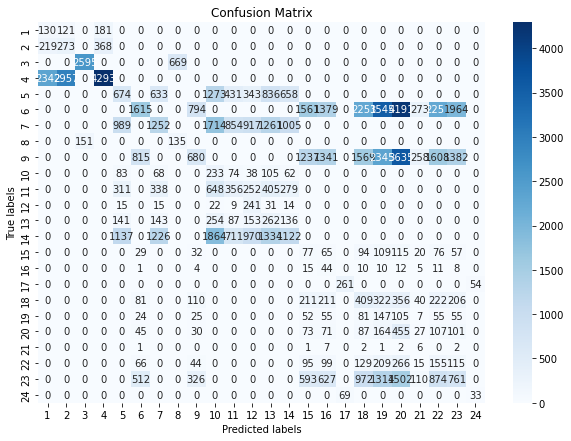

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## XGBoost

In [37]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Prepare the dataset
features = df.drop('Offense_Rank', axis=1)  # Use all columns except 'Offense_Rank' as features
target = df['Offense_Rank']  # Use 'Offense_Rank' as the target

# Convert target to zero-based labels if it's not already
# Check if the minimum label is greater than 0
if target.min() > 0:
    target = target - 1  # Subtract 1 from all labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize XGBoost model
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',  # For multiclass classification
    eval_metric='mlogloss',      # Evaluation metric for multiclass classification
    num_class=len(np.unique(y_train_smote)),  # Number of classes
    use_label_encoder=False,     # Suppress label encoder warning
    random_state=42
)

# Train the model on the resampled data
xgb_clf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_clf.predict(X_test_scaled)

# Convert predictions back to original labeling if they were adjusted
y_pred_original = y_pred + 1

# Evaluate the model using the original labeling
accuracy = accuracy_score(y_test + 1, y_pred_original)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print('--------------------')
print("Classification Report:")
print(classification_report(y_test + 1, y_pred_original))
print('--------------------')
cm_xg = confusion_matrix(y_test + 1, y_pred_original)

XGBoost Model Accuracy: 0.5405
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.34      0.30       432
           2       0.45      0.38      0.41       860
           3       0.96      0.96      0.96      3264
           4       0.92      0.92      0.92      9592
           5       0.38      0.25      0.30      4848
           6       0.68      0.70      0.69     19824
           7       0.53      0.54      0.54      7992
           8       0.55      0.53      0.54       286
           9       0.46      0.50      0.48     14870
          10       0.16      0.26      0.20       663
          11       0.34      0.38      0.36      2589
          12       0.20      0.60      0.30       347
          13       0.20      0.33      0.25      1176
          14       0.49      0.44      0.46      8364
          15       0.12      0.03      0.05       674
          16       0.09      0.39      0.15       120
      

### XGBoost Confusion Matrix

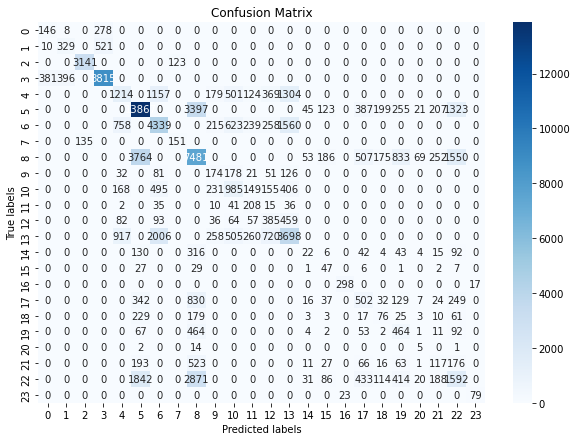

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xg, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()